In [145]:
# System
import os
import warnings

In [146]:
# Supress warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Suppress TensorFlow informational messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [147]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Machine learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [148]:
def create_sequences(data, time_step=1):
    X, y = [], []
    # 10 days ahead prediction
    for i in range(len(data) - time_step - 10):  
        X.append(data[i:(i + time_step), 0])
        # 10 days ahead
        y.append(data[i + time_step + 9, 0])  
    return np.array(X), np.array(y)

In [149]:
data = pd.read_csv('C:/Users/HP/Downloads/apple_stock.csv')
data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


In [150]:
# Convert 'Date' column records to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set column 'Date' as index
data.set_index('Date', inplace=True)

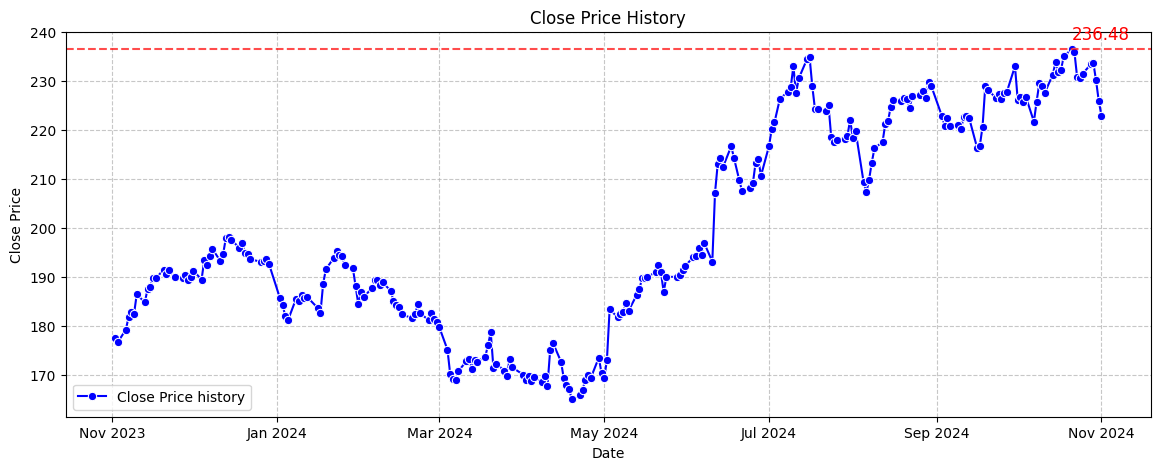

In [151]:
# Set the figure size
plt.figure(figsize=(14, 5))

# Plot the data
sns.lineplot(data=data, x=data.index, y='Close', label='Close Price history', marker='o', color='blue')

# Find the highest price and its corresponding date
max_price = data['Close'].max()
max_price_date = data['Close'].idxmax()

# Annotate the highest price
plt.annotate(f'{max_price:.2f}', 
             xy=(max_price_date, max_price), 
             xytext=(max_price_date, max_price + 2),
             fontsize=12, color='red')

# Add a horizontal line at the highest price
plt.axhline(max_price, linestyle='--', color='red', alpha=0.7)

# Set the title and labels
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()

# Display the plot
plt.show()

In [152]:
# Feature Selection: We will use the 'Close' price for prediction
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

In [153]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

In [154]:
# Define the time step
time_step = 60  # You can adjust this value based on your data

# Create the sequences
X, y = create_sequences(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [155]:
lr_model = LinearRegression()

# Reshape the data for Linear Regression (required format: [n_samples, n_features])
X_train_lr = X_train.reshape(X_train.shape[0], -1)  # Flatten the LSTM input for LR
X_test_lr = X_test.reshape(X_test.shape[0], -1)

In [156]:
lr_model.fit(X_train_lr, y_train)

LinearRegression()

In [157]:
# Make predictions using the Linear Regression model
lr_predictions = lr_model.predict(X_test_lr)

# Inverse transform the predictions to get the actual values
lr_predictions = scaler.inverse_transform(lr_predictions.reshape(-1, 1))

# Inverse transform the actual values for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

ValueError: Length of ndarray vectors must match length of `data` when both are used, but `data` has length 29 and the vector passed to `y` has length 19.

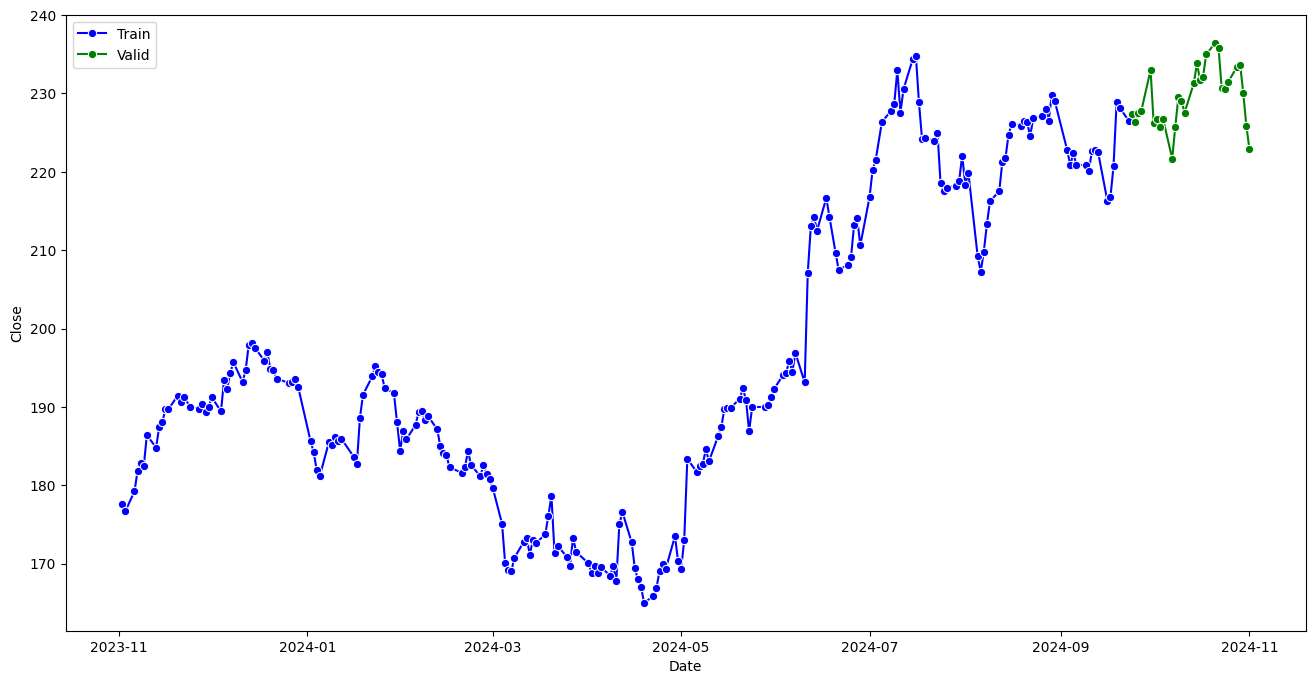

In [158]:
# Set the figure size
plt.figure(figsize=(16, 8))

# Plot the training data
sns.lineplot(data=train, x=train.index, y='Close', label='Train', marker='o', color='blue')

# Plot the validation data and Linear Regression predictions
sns.lineplot(data=valid, x=valid.index, y='Close', label='Valid', marker='o', color='green')
sns.lineplot(data=valid, x=valid.index, y=lr_predictions.flatten(), label='LR Predictions', marker='o', color='purple')

# Set the title and labels
plt.title('Model Predictions (Linear Regression) vs Actual Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(loc='lower right')

# Display the plot
plt.show()